In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
#from xgboost import XGBRegressor


In [16]:
import os
data_path = os.path.join(os.getcwd(),"data","stud.csv")
df = pd.read_csv(data_path)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
X = df.drop(columns = ['math_score'], axis=1)
Y = df[['math_score']]

In [18]:
numerical_cols = [feature for feature in X.columns if X[feature].dtype != 'O']
categorical_cols = [feature for feature in X.columns if X[feature].dtype == 'O']
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['reading_score', 'writing_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [19]:
print("Gender Categories:\n", df["gender"].unique())
print("\nRace Categories:\n", df["race_ethnicity"].unique())
print("\nParental Eductaion Categories:\n", df["parental_level_of_education"].unique())
print("\nLunch Categories:\n", df["lunch"].unique())
print("\nTest Prep Course Categories:\n", df["test_preparation_course"].unique())

Gender Categories:
 ['female' 'male']

Race Categories:
 ['group B' 'group C' 'group A' 'group D' 'group E']

Parental Eductaion Categories:
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Lunch Categories:
 ['standard' 'free/reduced']

Test Prep Course Categories:
 ['none' 'completed']


In [20]:
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

scaler = StandardScaler()
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_features),
        ('cat', ohe_encoder, cat_features)
    ]
)

X = preprocessor.fit_transform(X)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, Y_train.shape

((800, 14), (800, 1))

In [23]:
def evaluation_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    # "XGBoost Regressor": XGBRegressor()
}

model_list = []
r2_scores = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_mse, train_rmse, train_r2 = evaluation_metrics(Y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluation_metrics(Y_test, y_test_pred)


    print(f"Model: {list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])

    print(f"Training Evaluation Metrics:")
    print(f"MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}")

    print(f"Testing Evaluation Metrics:")
    print(f"MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")
    r2_scores.append(test_r2)
    print("-" * 50)



Model: Linear Regression
Training Evaluation Metrics:
MAE: 4.2667, MSE: 28.3349, RMSE: 5.3231, R2: 0.8743
Testing Evaluation Metrics:
MAE: 4.2148, MSE: 29.0952, RMSE: 5.3940, R2: 0.8804
--------------------------------------------------
Model: Ridge Regression
Training Evaluation Metrics:
MAE: 4.2650, MSE: 28.3397, RMSE: 5.3235, R2: 0.8743
Testing Evaluation Metrics:
MAE: 4.2125, MSE: 29.0908, RMSE: 5.3936, R2: 0.8805
--------------------------------------------------
Model: Lasso Regression
Training Evaluation Metrics:
MAE: 5.2063, MSE: 43.4783, RMSE: 6.5938, R2: 0.8071
Testing Evaluation Metrics:
MAE: 5.1579, MSE: 42.5063, RMSE: 6.5197, R2: 0.8253
--------------------------------------------------
Model: K-Nearest Neighbors
Training Evaluation Metrics:
MAE: 4.4623, MSE: 31.0938, RMSE: 5.5762, R2: 0.8621
Testing Evaluation Metrics:
MAE: 5.7470, MSE: 54.8710, RMSE: 7.4075, R2: 0.7745
--------------------------------------------------
Model: Support Vector Regressor
Training Evaluation 

/Users/vishalsharma/Downloads/ML_PROJECT/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishalsharma/Downloads/ML_PROJECT/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: CatBoost Regressor
Training Evaluation Metrics:
MAE: 2.4445, MSE: 9.5795, RMSE: 3.0951, R2: 0.9575
Testing Evaluation Metrics:
MAE: 4.6335, MSE: 36.5491, RMSE: 6.0456, R2: 0.8498
--------------------------------------------------


In [25]:
pd.DataFrame(list(zip(model_list, r2_scores)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880451
0,Linear Regression,0.880433
5,Random Forest Regressor,0.850705
6,CatBoost Regressor,0.849801
2,Lasso Regression,0.825320
3,K-Nearest Neighbors,0.774507
4,Support Vector Regressor,0.713014


In [26]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
mae, mse, rmse, r2 = evaluation_metrics(Y_test, y_pred)
print(f"Linear Regression Test Set Evaluation Metrics:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

Linear Regression Test Set Evaluation Metrics:
MAE: 4.2148, MSE: 29.0952, RMSE: 5.3940, R2: 0.8804


<Axes: >

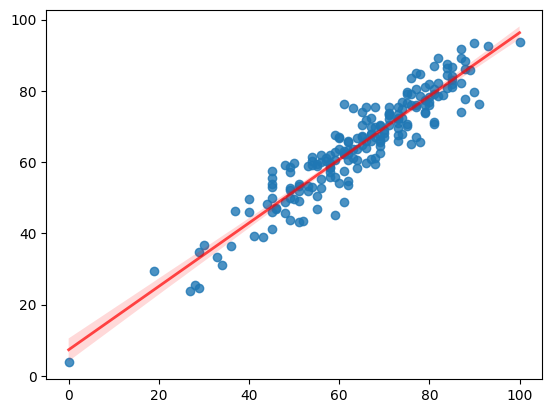

In [27]:
import seaborn as sns
sns.regplot(x =np.ravel(Y_test),y = np.ravel(y_pred), line_kws={"color":"r","alpha":0.7,"lw":2})

In [28]:
nums = [1, 2, 3, 2, 4, 5, 2, 6]


[1, 2, 3, 4, 5, 6]